<a href="https://colab.research.google.com/github/AgdaBeatriz4/HumanActivityRecognition/blob/main/testes_algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importações
import pandas as pd

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

import seaborn as sns

#skitlearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import itertools

In [ ]:
# mapa de cores personalizado utilizado para alguns gráficos
custom_cmap = matplotlib.colors.ListedColormap(["#94d2bdff", "#72c3b4ff", "#4fb3aaff", "#2da3a0ff", "#0a9396ff", "#057985ff", "#005f73ff", "#004f5fff", "#003f4bff", "#002932ff"])

pallete: https://coolors.co/94d2bd-72c3b4-4fb3aa-2da3a0-0a9396-057985-005f73-004f5f-003f4b-002932

In [ ]:
#funções utilizadas
def removePositions():
  global positions, positionsLabelsHistoric

  # subtrair arrays
  for a in positionsLabelsHistoric: 
    if a in positions: 
      positions.remove(a)

def addPositions():
  for a in positionsLabelsHistoric: 
    if a in positions: 
      positions.append(a)

def NewPositionSameLabel():
  global positions, positionsLabelsHistoric
  
  # transformando as posições da label que estao em tupla para lista
  positions = positionsCurrentCopyYTest[0].tolist()

  # subtrair arrays
  removePositions()

def newPredictionNewLabel():
  global newYtest, lock, formerLabel, labels, currentRandomLabel, positionsCurrentCopyYTest, positions, newPositionLabel, positionsLabelsHistoric, formerPrediction, currentPrediction, FP, TN

  positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

  positions = positionsCurrentCopyYTest[0].tolist()

  addPositions()

  newPositionLabel = random.choice(positions)

  formerPrediction = currentPrediction

  currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
  if currentPrediction == formerPrediction:
    FP = FP + 1
    trues.append(formerPrediction[0])
    predictions.append(currentPrediction[0])
    newYtest.append(1)
  else:
    TN = TN + 1
    trues.append(formerPrediction[0])
    predictions.append(currentPrediction[0])
    newYtest.append(1)
    
  labels.append(formerLabel)

def RFnewPredictionNewLabel():
  global newYtest, lock, formerLabel, labels, currentRandomLabel, positionsCurrentCopyYTest, positions, newPositionLabel, positionsLabelsHistoric, formerPrediction, currentPrediction, FP, TN

  positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

  positions = positionsCurrentCopyYTest[0].tolist()

  addPositions()

  newPositionLabel = random.choice(positions)

  formerPrediction = currentPrediction

  currentPrediction = Rf.predict(copyX_test[newPositionLabel].reshape(1, -1))
  if currentPrediction == formerPrediction:
    FP = FP + 1
    trues.append(formerPrediction[0])
    predictions.append(currentPrediction[0])
    newYtest.append(1)
  else:
    TN = TN + 1
    trues.append(formerPrediction[0])
    predictions.append(currentPrediction[0])
    newYtest.append(1)
    
  labels.append(formerLabel)

def newPredictionSameLabel():
  global newYtest, lock, formerLabel, labels, currentRandomLabel, positionsCurrentCopyYTest, positions, newPositionLabel, positionsLabelsHistoric, formerPrediction, currentPrediction, TP, FN

  positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

  positions = positionsCurrentCopyYTest[0].tolist()

  addPositions()

  newPositionLabel = random.choice(positions)

  formerPrediction = currentPrediction

  currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
  if currentPrediction == formerPrediction:
    TP = TP + 1
    trues.append(formerPrediction[0])
    predictions.append(currentPrediction[0])
    newYtest.append(0)
  else:
    FN = FN + 1
    trues.append(formerPrediction[0])
    predictions.append(currentPrediction[0])
    newYtest.append(0)

def RFnewPredictionSameLabel():
  global newYtest, lock, formerLabel, labels, currentRandomLabel, positionsCurrentCopyYTest, positions, newPositionLabel, positionsLabelsHistoric, formerPrediction, currentPrediction, TP, FN

  positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

  positions = positionsCurrentCopyYTest[0].tolist()

  addPositions()

  newPositionLabel = random.choice(positions)

  formerPrediction = currentPrediction

  currentPrediction = Rf.predict(copyX_test[newPositionLabel].reshape(1, -1))
  if currentPrediction == formerPrediction:
    TP = TP + 1
    trues.append(formerPrediction[0])
    predictions.append(currentPrediction[0])
    newYtest.append(0)
  else:
    FN = FN + 1
    trues.append(formerPrediction[0])
    predictions.append(currentPrediction[0])
    newYtest.append(0)

def uniqueLabel():
  global positionsCurrentCopyYTest, positions, positionsLabelsHistoric, newPositionLabel, formerPrediction, currentPrediction, FP, TN, TP, FN
  
  positionsCurrentCopyYTest = np.where(copyY_test == labels[0])

  positions = positionsCurrentCopyYTest[0].tolist()

  # subtrair arrays
  removePositions()

  newPositionLabel = random.choice(positions)
  positionsLabelsHistoric.append(newPositionLabel)

  formerPrediction = currentPrediction

  currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
  if currentPrediction == formerPrediction:
    FP = FP + 1
    trues.append(formerPrediction[0])
    predictions.append(currentPrediction[0])
  else:
    TN = TN + 1
    trues.append(formerPrediction[0])
    predictions.append(currentPrediction[0])


  for positionLabel in positions:
    formerPrediction = currentPrediction

    currentPrediction = knn.predict(copyX_test[positionLabel].reshape(1, -1))
    if currentPrediction == formerPrediction:
      TP = TP + 1
      trues.append(formerPrediction[0])
      predictions.append(currentPrediction[0])
    else:
      FN = FN + 1
      trues.append(formerPrediction[0])
      predictions.append(currentPrediction[0])

def RFuniqueLabel():
  global positionsCurrentCopyYTest, positions, positionsLabelsHistoric, newPositionLabel, formerPrediction, currentPrediction, FP, TN, TP, FN
  
  positionsCurrentCopyYTest = np.where(copyY_test == labels[0])

  positions = positionsCurrentCopyYTest[0].tolist()

  # subtrair arrays
  removePositions()

  newPositionLabel = random.choice(positions)
  positionsLabelsHistoric.append(newPositionLabel)

  formerPrediction = currentPrediction

  currentPrediction = Rf.predict(copyX_test[newPositionLabel].reshape(1, -1))
  if currentPrediction == formerPrediction:
    FP = FP + 1
    trues.append(formerPrediction[0])
    predictions.append(currentPrediction[0])
  else:
    TN = TN + 1
    trues.append(formerPrediction[0])
    predictions.append(currentPrediction[0])


  for positionLabel in positions:
    formerPrediction = currentPrediction

    currentPrediction = Rf.predict(copyX_test[positionLabel].reshape(1, -1))
    if currentPrediction == formerPrediction:
      TP = TP + 1
      trues.append(formerPrediction[0])
      predictions.append(currentPrediction[0])
    else:
      FN = FN + 1
      trues.append(formerPrediction[0])
      predictions.append(currentPrediction[0])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=custom_cmap):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# obtendo os parametros para multi-classe
def perf_measure(y_actual, y_hat):
    class_id = set(y_actual).union(set(y_pred))
    TP = []
    FP = []
    TN = []
    FN = []

    for index ,_id in enumerate(class_id):
        TP.append(0)
        FP.append(0)
        TN.append(0)
        FN.append(0)
        for i in range(len(y_pred)):
            if y_actual[i] == y_pred[i] == _id:
                TP[index] += 1
            if y_pred[i] == _id and y_actual[i] != y_pred[i]:
                FP[index] += 1
            if y_actual[i] == y_pred[i] != _id:
                TN[index] += 1
            if y_pred[i] != _id and y_actual[i] != y_pred[i]:
                FN[index] += 1


    return class_id,TP, FP, TN, FN

In [ ]:
# dataframe
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dados-final.csv")

In [ ]:
df

,x,y,z,label,id
0,8.147804,3.764403,3.036590,martelada,800
1,8.159846,3.744100,3.030269,martelada,800
2,8.171099,3.723893,3.022488,martelada,800
3,8.181370,3.704189,3.013414,martelada,800
4,8.190708,3.684652,3.003574,martelada,800
...,...,...,...,...,...
571790,-0.161896,7.825209,2.790873,pintura,1399
571791,-0.156030,7.814818,2.781129,pintura,1399
571792,-0.151218,7.805145,2.769421,pintura,1399
571793,-0.148201,7.795257,2.756157,pintura,1399


In [ ]:
# armazenando os valores de label
labelsName = df["label"].unique()

In [ ]:
# dataframe que ira armazenar os valores das features dos calculadas
df_trat = pd.DataFrame()

In [ ]:
# tempo de execução médio do código: 9 minutos
# for de iteração de cada label do dataframe
for lb in range(0, len(labelsName)):
  # tratando os dados: separando as linhas de cada label, split do ultimo numero da janela, retirando a coluna antiga da janela e inserindo a nova, armazenando os valores de cada janela
  dataLabel = df[df["label"] == labelsName[lb]]
  windowsDataLabel = dataLabel["id"].unique()

  cont = 0

  # for de iteração de cada janela de cada label do dataframe
  for window in range(len(df_trat), len(df_trat) + len(windowsDataLabel)):
    # calculando as features: maximo, minimo, binomial, media, mediana, variancia, desvp, mad
    df_trat.loc[window, 'maxX'] = dataLabel[dataLabel.id == windowsDataLabel[cont]].x.max()
    df_trat.loc[window, 'minX'] = dataLabel[dataLabel.id == windowsDataLabel[cont]].x.min()
    df_trat.loc[window, 'binX'] = (dataLabel[dataLabel.id == windowsDataLabel[cont]].x.max() - dataLabel[dataLabel.id == windowsDataLabel[cont]].x.min()) / 10
    df_trat.loc[window, 'medX'] = dataLabel[dataLabel.id == windowsDataLabel[cont]].x.mean()
    df_trat.loc[window, 'mediX'] = dataLabel[dataLabel.id == windowsDataLabel[cont]].x.median()
    df_trat.loc[window, 'varX'] = dataLabel[dataLabel.id == windowsDataLabel[cont]].x.var()
    df_trat.loc[window, 'desvX'] = dataLabel[dataLabel.id == windowsDataLabel[cont]].x.std()
    df_trat.loc[window, 'madX'] = dataLabel[dataLabel.id == windowsDataLabel[cont]].x.mad()

    df_trat.loc[window, 'maxY'] = dataLabel[dataLabel.id == windowsDataLabel[cont]].y.max()
    df_trat.loc[window, 'minY'] = dataLabel[dataLabel.id == windowsDataLabel[cont]].y.min()
    df_trat.loc[window, 'binnY'] = (dataLabel[dataLabel.id == windowsDataLabel[cont]].y.max() - dataLabel[dataLabel.id == windowsDataLabel[cont]].y.min()) / 10
    df_trat.loc[window, 'medY'] = dataLabel[dataLabel.id == windowsDataLabel[cont]].y.mean()
    df_trat.loc[window, 'mediY'] = dataLabel[dataLabel.id == windowsDataLabel[cont]].y.median()
    df_trat.loc[window, 'varY'] = dataLabel[dataLabel.id == windowsDataLabel[cont]].y.var()
    df_trat.loc[window, 'desvY'] = dataLabel[dataLabel.id == windowsDataLabel[cont]].y.std()
    df_trat.loc[window, 'madY'] = dataLabel[dataLabel.id == windowsDataLabel[cont]].y.mad()

    df_trat.loc[window, 'maxZ'] = dataLabel[dataLabel.id == windowsDataLabel[cont]].z.max()
    df_trat.loc[window, 'minZ'] = dataLabel[dataLabel.id == windowsDataLabel[cont]].z.min()
    df_trat.loc[window, 'binZ'] = (dataLabel[dataLabel.id == windowsDataLabel[cont]].z.max() - dataLabel[dataLabel.id == windowsDataLabel[cont]].z.min()) / 10
    df_trat.loc[window, 'medZ'] = dataLabel[dataLabel.id == windowsDataLabel[cont]].z.mean()
    df_trat.loc[window, 'mediZ'] = dataLabel[dataLabel.id == windowsDataLabel[cont]].z.median()
    df_trat.loc[window, 'varZ'] = dataLabel[dataLabel.id == windowsDataLabel[cont]].z.var()
    df_trat.loc[window, 'desvZ'] = dataLabel[dataLabel.id == windowsDataLabel[cont]].z.std()
    df_trat.loc[window, 'madZ'] = dataLabel[dataLabel.id == windowsDataLabel[cont]].z.mad()

    cont+=1

    df_trat.loc[window, 'label'] = labelsName[lb]

df_trat

,maxX,minX,binX,medX,mediX,varX,desvX,madX,maxY,minY,...,madY,maxZ,minZ,binZ,medZ,mediZ,varZ,desvZ,madZ,label
0,10.752264,5.416091,0.533617,8.692308,9.018766,3.066019,1.751005,1.430726,4.461020,2.335328,...,0.550512,3.658364,1.569615,0.208875,2.847096,2.992393,0.356193,0.596819,0.477788,martelada
1,11.638023,5.537142,0.610088,8.551710,8.675857,4.477125,2.115922,1.917456,4.611400,2.423435,...,0.648245,2.687324,1.775732,0.091159,2.263263,2.271643,0.091025,0.301703,0.271548,martelada
2,11.281454,5.583829,0.569763,8.475475,8.646300,3.930363,1.982514,1.771555,5.383363,2.884822,...,0.683009,2.397434,1.327705,0.106973,1.997504,2.053100,0.074944,0.273759,0.214957,martelada
3,11.256459,5.706436,0.555002,8.553495,8.712847,3.804258,1.950451,1.773955,5.347785,3.150961,...,0.520026,1.708598,0.809097,0.089950,1.380325,1.443416,0.055778,0.236175,0.197632,martelada
4,11.327184,6.070618,0.525657,8.705269,8.839931,3.284496,1.812318,1.560465,4.350001,2.735040,...,0.423351,2.872563,1.617068,0.125550,2.283568,2.235610,0.104168,0.322751,0.283513,martelada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,5.875216,-5.619118,1.149433,-1.130334,-2.282014,16.554500,4.068722,3.661541,0.272329,-1.948425,...,0.684939,16.890777,-9.060993,2.595177,5.095985,6.430708,84.299414,9.181471,8.204059,levantamento-peso
1796,5.832886,-5.080519,1.091340,-0.845417,-2.218442,14.989003,3.871563,3.483038,0.604656,-2.481518,...,0.912858,17.325804,-8.853331,2.617914,5.015656,5.881519,85.722133,9.258625,8.284743,levantamento-peso
1797,5.318840,-5.902904,1.122174,-0.897994,-1.849377,15.771874,3.971382,3.580758,0.109751,-1.611321,...,0.453093,17.639816,-9.257173,2.689699,4.938518,5.872039,90.756979,9.526646,8.510504,levantamento-peso
1798,5.958474,-6.938216,1.289669,-1.522367,-2.679045,21.023898,4.585182,4.112113,0.460021,-1.857829,...,0.680934,17.114121,-8.856910,2.597103,5.007875,5.943350,83.848466,9.156881,8.206662,levantamento-peso


In [ ]:
df_chines = pd.read_csv("https://raw.githubusercontent.com/zhangzhao156/Human-Activity-Recognition-Codes-Datasets/master/data/SanitationDataset/sanitation.csv")

In [ ]:
# armazenando os valores de label
labelsName = df_chines["label"].unique()

In [ ]:
# dataframe que ira armazenar os valores das features dos calculadas
df_trat_chines = pd.DataFrame()

In [ ]:
# tempo de execução médio do código: 9 minutos
# for de iteração de cada label do dataframe
for lb in range(0, len(labelsName)):
  # tratando os dados: separando as linhas de cada label, split do ultimo numero da janela, retirando a coluna antiga da janela e inserindo a nova, armazenando os valores de cada janela
  dfSplited = df_chines[df_chines["label"] == labelsName[lb]]
  lastNDfSplited = dfSplited["seg"].squeeze()
  lastNDfSplited = lastNDfSplited.str.rsplit("-", n=1, expand=True)
  lastNDfSplited.rename(columns={0: 'seg', 1: 'random'}, inplace=True)
  dfSplited = dfSplited.drop(columns=['seg'])
  dfSplited = pd.concat([dfSplited, lastNDfSplited], axis=1)
  dfSplited = dfSplited[['x', 'y', 'z', 'label', 'seg', 'random', 'suspicious']]
  windowsDfSplited = dfSplited["random"].unique()

  cont = 0

  # for de iteração de cada janela de cada label do dataframe
  for window in range(len(df_trat_chines), len(df_trat_chines) + len(windowsDfSplited)):
    # calculando as features: maximo, minimo, binomial, media, mediana, variancia, desvp, mad
    df_trat_chines.loc[window, 'maxX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.max()
    df_trat_chines.loc[window, 'minX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.min()
    df_trat_chines.loc[window, 'binX'] = (dfSplited[dfSplited.random == windowsDfSplited[cont]].x.max() - dfSplited[dfSplited.random == windowsDfSplited[cont]].x.min()) / 10
    df_trat_chines.loc[window, 'medX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.mean()
    df_trat_chines.loc[window, 'mediX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.median()
    df_trat_chines.loc[window, 'varX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.var()
    df_trat_chines.loc[window, 'desvX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.std()
    df_trat_chines.loc[window, 'madX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.mad()

    df_trat_chines.loc[window, 'maxY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.max()
    df_trat_chines.loc[window, 'minY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.min()
    df_trat_chines.loc[window, 'binnY'] = (dfSplited[dfSplited.random == windowsDfSplited[cont]].y.max() - dfSplited[dfSplited.random == windowsDfSplited[cont]].y.min()) / 10
    df_trat_chines.loc[window, 'medY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.mean()
    df_trat_chines.loc[window, 'mediY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.median()
    df_trat_chines.loc[window, 'varY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.var()
    df_trat_chines.loc[window, 'desvY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.std()
    df_trat_chines.loc[window, 'madY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.mad()

    df_trat_chines.loc[window, 'maxZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.max()
    df_trat_chines.loc[window, 'minZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.min()
    df_trat_chines.loc[window, 'binZ'] = (dfSplited[dfSplited.random == windowsDfSplited[cont]].z.max() - dfSplited[dfSplited.random == windowsDfSplited[cont]].z.min()) / 10
    df_trat_chines.loc[window, 'medZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.mean()
    df_trat_chines.loc[window, 'mediZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.median()
    df_trat_chines.loc[window, 'varZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.var()
    df_trat_chines.loc[window, 'desvZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.std()
    df_trat_chines.loc[window, 'madZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.mad()

    cont+=1

    df_trat_chines.loc[window, 'label'] = labelsName[lb]

df_trat_chines

,maxX,minX,binX,medX,mediX,varX,desvX,madX,maxY,minY,...,madY,maxZ,minZ,binZ,medZ,mediZ,varZ,desvZ,madZ,label
0,143.0,-128.0,27.1,-42.970588,-77.0,6320.655838,79.502552,68.980104,896.0,696.0,...,33.126298,-460.0,-691.0,23.1,-536.161765,-531.0,2895.421203,53.809118,43.117215,walk
1,-88.0,-143.0,5.5,-109.395349,-105.0,246.339978,15.695221,13.482964,961.0,843.0,...,28.484586,-159.0,-445.0,28.6,-312.511628,-322.0,8310.589147,91.162433,80.174148,walk
2,15.0,-61.0,7.6,-24.238095,-30.0,319.795587,17.882829,15.204082,1006.0,951.0,...,9.793651,-10.0,-134.0,12.4,-52.738095,-40.5,1344.783391,36.671288,31.379819,walk
3,-59.0,-160.0,10.1,-120.176471,-128.0,559.550483,23.654819,20.008651,1016.0,851.0,...,28.766003,-58.0,-455.0,39.7,-213.500000,-186.5,9542.522388,97.685835,83.250000,walk
4,1053.0,-130.0,118.3,517.697674,631.0,215070.930233,463.757405,431.114116,772.0,77.0,...,139.366144,137.0,-835.0,97.2,-473.325581,-577.0,94687.796235,307.713822,269.156301,walk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389,737.0,621.0,11.6,681.467742,679.0,431.597303,20.774920,16.239854,371.0,271.0,...,20.555671,729.0,619.0,11.0,673.370968,679.0,912.302750,30.204350,26.528616,run
4390,804.0,661.0,14.3,730.326531,734.0,1335.016156,36.537873,30.211579,421.0,288.0,...,35.099542,700.0,518.0,18.2,599.265306,588.0,3028.698980,55.033617,46.202416,run
4391,1078.0,404.0,67.4,756.268293,763.0,23795.501220,154.257905,104.638905,428.0,-146.0,...,112.424747,794.0,315.0,47.9,623.268293,646.0,10985.351220,104.811026,71.633551,run
4392,1126.0,581.0,54.5,771.577465,757.0,7817.676056,88.417623,47.450506,465.0,35.0,...,50.536005,726.0,396.0,33.0,598.732394,611.0,4019.170221,63.396926,42.271771,run


In [ ]:
atividades = ["bweep", "sweep", "daily"]

for atividade in atividades:
  df2 = df_trat_chines[df_trat_chines["label"] == atividade]
  df2 = df2.reset_index(drop = True)
  df_trat = pd.concat([df_trat, df2[df2["label"] == atividade].loc[0:600]])

# df_trat = df_trat.reset_index(drop = True)

In [ ]:
labelsNameFinal = df_trat["label"].unique()

In [ ]:
# arredondando os valores das features
df_trat = df_trat.round(2)

## Tratamento

bweep = 0
clean = 1
daily = 2
dump = 3
run = 4
sweep = 5
walk = 6

pallet: https://coolors.co/001219-005f73-0a9396-94d2bd-e9d8a6-ee9b00-ca6702-bb3e03-ae2012-9b2226

In [ ]:
df_trat["label"] = df_trat["label"].astype('category')
df_trat["label"] = df_trat["label"].cat.codes

In [ ]:
X = df_trat.iloc[:,0:24].values
Y = df_trat.iloc[:,24:25].values

In [ ]:
smt = SMOTE()

In [ ]:
X, Y = smt.fit_resample(X, Y)

In [ ]:
# #Quantidades
# qtd0 = [len(df_trat[df_trat["label"] == 0]), len(X[Y == 0])]
# qtd1 = [len(df_trat[df_trat["label"] == 1]), len(X[Y == 1])]
# qtd2 = [len(df_trat[df_trat["label"] == 2]), len(X[Y == 2])]
# qtd3 = [len(df_trat[df_trat["label"] == 3]), len(X[Y == 3])]
# qtd4 = [len(df_trat[df_trat["label"] == 4]), len(X[Y == 4])]
# qtd5 = [len(df_trat[df_trat["label"] == 5]), len(X[Y == 5])]
# qtd6 = [len(df_trat[df_trat["label"] == 6]), len(X[Y == 6])]

# # Tamanho das barras
# barWidth = 0.1

# # Tamanho da figura
# plt.figure(figsize=(12,6))

# # Posição das barras
# r0 = np.arange(len(qtd0))
# r1 = [x + barWidth for x in r0]
# r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]
# r4 = [x + barWidth for x in r3]
# r5 = [x + barWidth for x in r4]
# r6 = [x + barWidth for x in r5]

# # Criando as barras
# plt.bar(r0, qtd0, color="#005f73", width=barWidth, label="Bweep")
# plt.bar(r1, qtd1, color="#0a9396", width=barWidth, label="Clean")
# plt.bar(r2, qtd2, color="#94d2bd", width=barWidth, label="Daily")
# plt.bar(r3, qtd3, color="#e9d8a6", width=barWidth, label="Dump")
# plt.bar(r4, qtd4, color="#ee9b00", width=barWidth, label="Run")
# plt.bar(r5, qtd5, color="#ca6702", width=barWidth, label="Sweep")
# plt.bar(r6, qtd6, color="#bb3e03", width=barWidth, label="Walk")

# # Adicionando legenda as barras
# plt.xlabel('Atividades')
# plt.xticks([r + barWidth for r in range(len(qtd0))], ['Desbalanceados', 'Balanceados'])
# plt.ylabel('Amostras')
# plt.title('Comparação quantidade de amostras Antes e Pós Balanceamento')

# # Legenda e exibindo o gráfico
# plt.legend()
# plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.3,
    random_state=10
)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Random Forest

In [ ]:
Rf = RandomForestClassifier(n_estimators = 200)

In [ ]:
Rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
prediction = Rf.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, prediction))

Accuracy: 0.9630314232902033


In [ ]:
f1_score(
    y_test, 
    prediction, 
    average='weighted'
) 

0.9632052743399174

In [ ]:
labels = df_trat["label"].unique()

In [ ]:
labels

array([3, 4, 2, 0, 5, 1], dtype=int8)

In [ ]:
labelsNameFinal

array(['martelada', 'pintura', 'levantamento-peso', 'bweep', 'sweep',
       'daily'], dtype=object)

In [ ]:
labelsNameFinal.sort()
labels.sort()

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       166
           1       0.97      0.93      0.95       184
           2       1.00      1.00      1.00       177
           3       1.00      1.00      1.00       184
           4       1.00      1.00      1.00       197
           5       0.93      0.93      0.93       174

    accuracy                           0.96      1082
   macro avg       0.96      0.96      0.96      1082
weighted avg       0.96      0.96      0.96      1082

Confusion matrix, without normalization
[[150   6   0   0   0  10]
 [ 10 172   0   0   0   2]
 [  0   0 177   0   0   0]
 [  0   0   0 184   0   0]
 [  0   0   0   0 197   0]
 [ 12   0   0   0   0 162]]


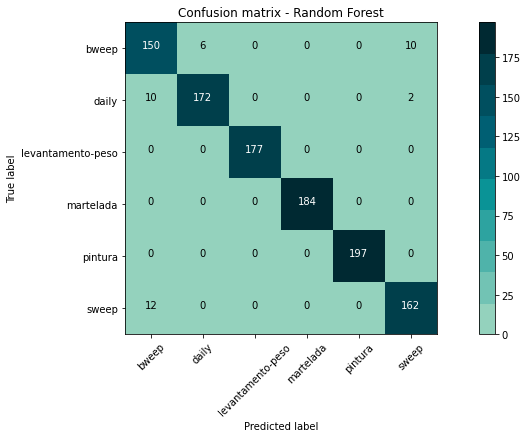

In [ ]:
cnf_matrix = confusion_matrix(
    y_test, 
    prediction, 
    labels=labels.tolist())

np.set_printoptions(precision=2)

print(classification_report(y_test, prediction))

# Plot non-normalized confusion matrix
plt.figure(figsize=(12, 6))
plot_confusion_matrix(
    cnf_matrix, 
    classes=labelsNameFinal.tolist(),
    normalize= False,  
    title='Confusion matrix - Random Forest')

In [ ]:
# validação cruzada
num_folds = 5
scores = cross_val_score(Rf, X_train, y_train, cv = num_folds)

In [ ]:
scores

array([0.95, 0.96, 0.97, 0.96, 0.97])

In [ ]:
for v in scores:
  print(v)

0.9524752475247524
0.9584158415841584
0.9722772277227723
0.9564356435643564
0.9662698412698413


In [ ]:
stdevCross = scores.std()
stdevCross

0.007141106572574477

### Avaliação de mudança de atividade

#### Probabilidade única

In [ ]:
copyX_test = X_test
copyY_test = y_test

In [ ]:
# tempo de execução médio do código: 5 minutos
# accuracys = []
# FPs = []
# FNs = []
trues = []
predictions = []
# for i in np.arange(0.1, 1, 0.1):
# labels = [0, 1, 2, 3, 4, 5, 6]
labels = df_trat["label"].unique().tolist()

TP = 0
TN = 0
FP = 0
FN = 0

numbers = []

newYtest = []

formerLabel = 0
formerPrediction = 0

lock = 0

initialRandomLabel = random.choice(labels) # Label aleatória inicial

positionsInitialCopyYTest = np.where(copyY_test == initialRandomLabel) # Todas as posições em que a label inicial aparece
positionsCurrentCopyYTest = positionsInitialCopyYTest

initialPositionLabel = copyY_test[random.choice(positionsInitialCopyYTest[0])] # Posição aleatória em que a label inicial aparece, essa posição tambem valera para a primeira amostra
currentRandomLabel = initialRandomLabel # label atual, no inicio da analise a label inicial é a label atual 

positionsLabelsHistoric = []


initialPrediction = Rf.predict(copyX_test[initialPositionLabel].reshape(1, -1)) # predição da linha inicial da analise
currentPrediction = initialPrediction

positionsLabelsHistoric.append(initialPositionLabel)


# loop da analise que ira iterar cada amostra do conjunto de amostras
random.seed(random.randint(1, 100000))
while True:
  if (FP + TP + TN + FN) == len(copyX_test) * 10:
    break
  else:
    randomNumber = random.random()
    numbers.append(randomNumber)

    # Analisando nova amostra da mesma atividade 
    if randomNumber >= 0.005:
      NewPositionSameLabel()

      if positions == []:
        RFnewPredictionSameLabel()
      else:
        newPositionLabel = random.choice(positions)
        positionsLabelsHistoric.append(newPositionLabel)

        formerPrediction = currentPrediction

        currentPrediction = Rf.predict(copyX_test[newPositionLabel].reshape(1, -1))
        if currentPrediction == formerPrediction:
          TP = TP + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])
          newYtest.append(0)
        else:
          FN = FN + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])
          newYtest.append(0)

    # Analise de uma nova amostra de atividade diferente
    if randomNumber < 0.005:
      # armazenando a antiga label e removendo a mesma temporariamente do array de labels
      formerLabel = currentRandomLabel
      labels.remove(formerLabel)

      # Randomizando uma nova label
      currentRandomLabel = random.choice(labels)
      # NDArray com as posições da nova label e randomização da posição aleatoria
      positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

      NewPositionSameLabel()

      if positions == []:
        RFnewPredictionNewLabel()
      else:
        newPositionLabel = random.choice(positions)
        positionsLabelsHistoric.append(newPositionLabel)

        formerPrediction = currentPrediction

        currentPrediction = Rf.predict(copyX_test[newPositionLabel].reshape(1, -1))
        if currentPrediction == formerPrediction:
          FP = FP + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])
          newYtest.append(1)
        else:
          TN = TN + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])
          newYtest.append(1)

        # devolvendo a label antiga ao array de labels
        labels.append(formerLabel)

print(FP)
print(FN)
print(TP)
print(TN)

accuracy = (TP + TN)/(TP + TN + FP + FN)
# accuracys.append(accuracy)
# FPs.append(FP)
# FNs.append(FN)


0
766
10001
53


In [ ]:
accuracy

0.9292051756007393

In [ ]:
labels = df_trat["label"].unique()
labels.sort()

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1908
           1       0.85      0.85      0.85      1015
           2       0.99      0.99      0.99      1090
           3       1.00      1.00      1.00      2778
           4       0.99      1.00      0.99      1895
           5       0.88      0.88      0.88      2134

    accuracy                           0.92     10820
   macro avg       0.92      0.92      0.92     10820
weighted avg       0.92      0.92      0.92     10820

Confusion matrix, without normalization
[[1531  129    2    1    3  242]
 [ 131  866    1    2    3   12]
 [   1    2 1081    4    0    2]
 [   3    1    3 2766    2    3]
 [   1    2    1    2 1886    3]
 [ 241   15    2    3    2 1871]]


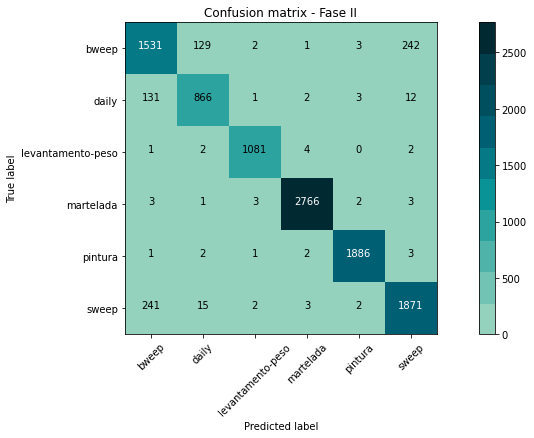

In [ ]:
cnf_matrix = confusion_matrix(trues, predictions, labels=labels.tolist())
np.set_printoptions(precision=2)

print (classification_report(trues, predictions))

# Plot non-normalized confusion matrix
plt.figure(figsize=(12, 6))
plot_confusion_matrix(cnf_matrix, classes=labelsNameFinal.tolist(),normalize= False,  title='Confusion matrix - Fase II')

In [ ]:
f1_score(trues, predictions, average='weighted')

0.9243013851482211

# KNN

## Teste do algoritmo

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# treinando o modelo
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# predição dos valores do conjunto de teste
y_pred = knn.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))
# print("Precision Test:",metrics.precision_score(y_test,y_pred))
# print("Recall Test:",metrics.recall_score(y_test,y_pred))

Accuracy: 0.9500924214417745


In [ ]:
f1_score(y_test, y_pred, average='weighted') 

0.9505559992467827

In [ ]:
labels = df_trat["label"].unique()

In [ ]:
labelsName.sort()
labels.sort()

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       166
           1       0.98      0.90      0.93       184
           2       1.00      1.00      1.00       177
           3       1.00      1.00      1.00       184
           4       1.00      1.00      1.00       197
           5       0.89      0.91      0.90       174

    accuracy                           0.95      1082
   macro avg       0.95      0.95      0.95      1082
weighted avg       0.95      0.95      0.95      1082

Confusion matrix, without normalization
[[147   4   0   0   0  15]
 [ 14 165   0   0   0   5]
 [  0   0 177   0   0   0]
 [  0   0   0 184   0   0]
 [  0   0   0   0 197   0]
 [ 16   0   0   0   0 158]]


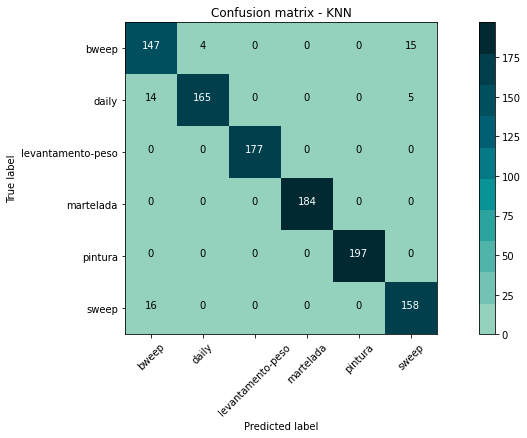

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=labels.tolist())
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure(figsize=(12, 6))
plot_confusion_matrix(cnf_matrix, classes=labelsNameFinal.tolist(),normalize= False,  title='Confusion matrix - KNN')

In [ ]:
accuracys = []

# Calculating error for K values between 1 and 10
for i in range(1, 11):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracys.append(accuracy_score(y_test, pred_i))

In [ ]:
accuracys

[0.9537892791127541,
 0.9519408502772643,
 0.9500924214417745,
 0.9519408502772643,
 0.9500924214417745,
 0.9454713493530499,
 0.9473197781885397,
 0.9426987060998152,
 0.9426987060998152,
 0.9426987060998152]

In [ ]:
accuracys = [accuracys[2], accuracys[4], accuracys[6]]

In [ ]:
accuracys

[0.9500924214417745, 0.9500924214417745, 0.9473197781885397]

Text(0, 0.5, 'Accuracy')

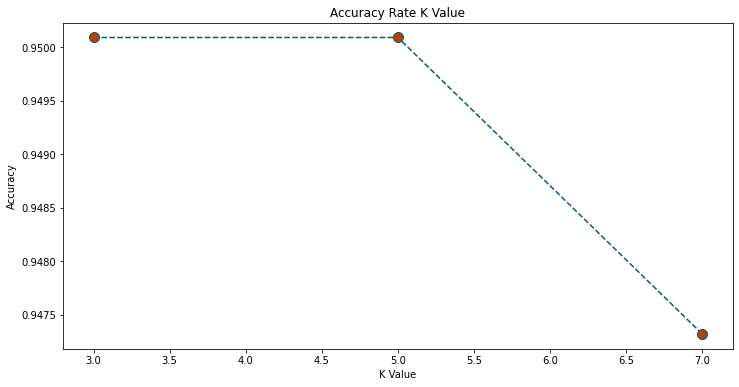

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot([3, 5, 7], accuracys, color='#005f73', linestyle='dashed', marker='o',  
         markerfacecolor='#bb3e03', markersize=10)
plt.title('Accuracy Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy')

In [ ]:
# validação cruzada
num_folds = 5
scores = cross_val_score(knn, X_train, y_train, cv = num_folds)

In [ ]:
scores

array([0.93, 0.94, 0.94, 0.96, 0.97])

In [ ]:
for v in scores:
  print(v)

0.9346534653465347
0.9386138613861386
0.9445544554455445
0.9623762376237623
0.9682539682539683


In [ ]:
stdevCross = scores.std()
stdevCross

0.01327187688640581

## Avaliação mudança de atividade

1. Escolher uma amostra de um tipo de atividade qualquer e rodar a avaliação do algoritmo.

2. Sortear um numero com probabilidade de 10% para um numero e 90% para outra, caso caia nos 10% escolher uma outra amostra de uma atividade diferente, do contrário escolher outra amostra com a mesma atividade.

3. Rodar a avaliação do algoritmo.

4. Repetir os passos com o restante das amostras.

5. Ao final, analizar as métricas.

> Sequencia de uma atividade - > 0.995 (99,5%)

- Algoritmo identificar como atividade diferente (mudança de atividade para o algoritmo) marcar como FN
- Algoritmo identificar como mesma atividade (não mudança de atividade para o algoritmo) marcar como TP

> Mudança de atividade - <= 0.005 (0,5%)

- Algoritmo identificar como atividade diferente (mudança de atividade para o algoritmo) marcar como TN
- Algoritmo identificar como mesma atividade (não mudança de atividade para o algoritmo) marcar como FP


In [ ]:
copyX_test = X_test
copyY_test = y_test

In [ ]:
len(X_test)

1082

### 1. Probabilidade única

In [ ]:
# tempo de execução médio do código: 5 minutos
# accuracys = []
# FPs = []
# FNs = []
trues = []
predictions = []
# for i in np.arange(0.1, 1, 0.1):
# labels = [0, 1, 2, 3, 4, 5, 6]
labels = df_trat["label"].unique().tolist()

TP = 0
TN = 0
FP = 0
FN = 0

numbers = []

newYtest = []

formerLabel = 0
formerPrediction = 0

lock = 0

initialRandomLabel = random.choice(labels) # Label aleatória inicial

positionsInitialCopyYTest = np.where(copyY_test == initialRandomLabel) # Todas as posições em que a label inicial aparece
positionsCurrentCopyYTest = positionsInitialCopyYTest

initialPositionLabel = copyY_test[random.choice(positionsInitialCopyYTest[0])] # Posição aleatória em que a label inicial aparece, essa posição tambem valera para a primeira amostra
currentRandomLabel = initialRandomLabel # label atual, no inicio da analise a label inicial é a label atual 

positionsLabelsHistoric = []


initialPrediction = knn.predict(copyX_test[initialPositionLabel].reshape(1, -1)) # predição da linha inicial da analise
currentPrediction = initialPrediction

positionsLabelsHistoric.append(initialPositionLabel)


# loop da analise que ira iterar cada amostra do conjunto de amostras
random.seed(random.randint(1, 100000))
while True:
  if (FP + TP + TN + FN) == len(copyX_test) * 10:
    break
  else:
    randomNumber = random.random()
    numbers.append(randomNumber)

    # Analisando nova amostra da mesma atividade 
    if randomNumber >= 0.005:
      NewPositionSameLabel()

      if positions == []:
        newPredictionSameLabel()
      else:
        newPositionLabel = random.choice(positions)
        positionsLabelsHistoric.append(newPositionLabel)

        formerPrediction = currentPrediction

        currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
        if currentPrediction == formerPrediction:
          TP = TP + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])
          newYtest.append(0)
        else:
          FN = FN + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])
          newYtest.append(0)

    # Analise de uma nova amostra de atividade diferente
    if randomNumber < 0.005:
      # armazenando a antiga label e removendo a mesma temporariamente do array de labels
      formerLabel = currentRandomLabel
      labels.remove(formerLabel)

      # Randomizando uma nova label
      currentRandomLabel = random.choice(labels)
      # NDArray com as posições da nova label e randomização da posição aleatoria
      positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

      NewPositionSameLabel()

      if positions == []:
        newPredictionNewLabel()
      else:
        newPositionLabel = random.choice(positions)
        positionsLabelsHistoric.append(newPositionLabel)

        formerPrediction = currentPrediction

        currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
        if currentPrediction == formerPrediction:
          FP = FP + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])
          newYtest.append(1)
        else:
          TN = TN + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])
          newYtest.append(1)

        # devolvendo a label antiga ao array de labels
        labels.append(formerLabel)

print(FP)
print(FN)
print(TP)
print(TN)

accuracy = (TP + TN)/(TP + TN + FP + FN)
# accuracys.append(accuracy)
# FPs.append(FP)
# FNs.append(FN)


0
1093
9674
53


In [ ]:
accuracy

0.8989833641404806

In [ ]:
labels = df_trat["label"].unique()
labels.sort()

              precision    recall  f1-score   support

           0       0.65      0.65      0.65      1263
           1       0.86      0.86      0.86      2570
           2       1.00      1.00      1.00      1711
           3       0.99      0.99      0.99      1949
           4       0.99      0.99      0.99      2193
           5       0.72      0.72      0.72      1134

    accuracy                           0.89     10820
   macro avg       0.87      0.87      0.87     10820
weighted avg       0.89      0.89      0.89     10820

Confusion matrix, without normalization
[[ 820  239    1    3    2  198]
 [ 242 2211    1    2    2  112]
 [   2    3 1704    1    0    1]
 [   1    2    2 1938    4    2]
 [   2    2    3    4 2181    1]
 [ 196  113    0    1    4  820]]


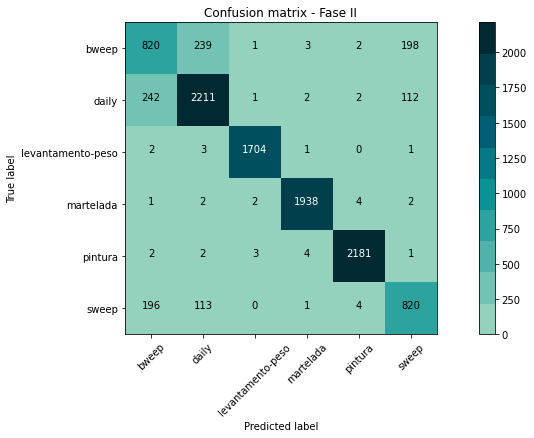

In [ ]:
cnf_matrix = confusion_matrix(trues, predictions, labels=labels.tolist())
np.set_printoptions(precision=2)

print (classification_report(trues, predictions))

# Plot non-normalized confusion matrix
plt.figure(figsize=(12, 6))
plot_confusion_matrix(cnf_matrix, classes=labelsNameFinal.tolist(),normalize= False,  title='Confusion matrix - Fase II')

In [ ]:
f1_score(trues, predictions, average='weighted')

0.8940850277264325

### 2. Variação das probabilidades

In [ ]:
copyX_test = X_test
copyY_test = y_test

In [ ]:
# tempo de execução médio do código: 5 minutos
accuracys = []
FPs = []
FNs = []

for i in np.arange(0.1, 1, 0.1):
  labels = df_trat["label"].unique().tolist()

  TP = 0
  TN = 0
  FP = 0
  FN = 0

  newYtest = []

  formerLabel = 0
  formerPrediction = 0

  lock = 0

  initialRandomLabel = random.choice(labels) # Label aleatória inicial

  positionsInitialCopyYTest = np.where(copyY_test == initialRandomLabel) # Todas as posições em que a label inicial aparece
  positionsCurrentCopyYTest = positionsInitialCopyYTest

  initialPositionLabel = copyY_test[random.choice(positionsInitialCopyYTest[0])] # Posição aleatória em que a label inicial aparece, essa posição tambem valera para a primeira amostra
  currentRandomLabel = initialRandomLabel # label atual, no inicio da analise a label inicial é a label atual 

  positionsLabelsHistoric = []


  initialPrediction = knn.predict(copyX_test[initialPositionLabel].reshape(1, -1)) # predição da linha inicial da analise
  currentPrediction = initialPrediction

  positionsLabelsHistoric.append(initialPositionLabel)

  random.seed(random.randint(1, 10000))
  # loop da analise que ira iterar cada amostra do conjunto de amostras
  while True:
    if (FP + TP + TN + FN) == len(copyX_test):
      break
    else:
      randomNumber = random.random()

      # Analisando nova amostra da mesma atividade 
      if randomNumber > i:
        NewPositionSameLabel()

        if positions == []:
          newPredictionSameLabel()
        else:
          newPositionLabel = random.choice(positions)
          positionsLabelsHistoric.append(newPositionLabel)

          formerPrediction = currentPrediction

          currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
          if currentPrediction == formerPrediction:
            TP = TP + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])
            newYtest.append(0)
          else:
            FN = FN + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])
            newYtest.append(0)

      # Analise de uma nova amostra de atividade diferente
      if randomNumber < i:
        # armazenando a antiga label e removendo a mesma temporariamente do array de labels
        formerLabel = currentRandomLabel
        labels.remove(formerLabel)

        # Randomizando uma nova label
        currentRandomLabel = random.choice(labels)
        # NDArray com as posições da nova label e randomização da posição aleatoria
        positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

        NewPositionSameLabel()

        if positions == []:
          newPredictionNewLabel()
        else:
          newPositionLabel = random.choice(positions)
          positionsLabelsHistoric.append(newPositionLabel)

          formerPrediction = currentPrediction

          currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
          if currentPrediction == formerPrediction:
            FP = FP + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])
            newYtest.append(1)
          else:
            TN = TN + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])
            newYtest.append(1)

          # devolvendo a label antiga ao array de labels
          labels.append(formerLabel)

  accuracy = (TP + TN)/(TP + TN + FP + FN)
  accuracys.append(accuracy)
  FPs.append(FP)
  FNs.append(FN)

In [ ]:
accuracys

[0.9057301293900185,
 0.9186691312384473,
 0.9094269870609981,
 0.9232902033271719,
 0.9316081330868762,
 0.9500924214417745,
 0.9630314232902033,
 0.9602587800369686,
 0.9611829944547134]

Text(0, 0.5, 'FPs')

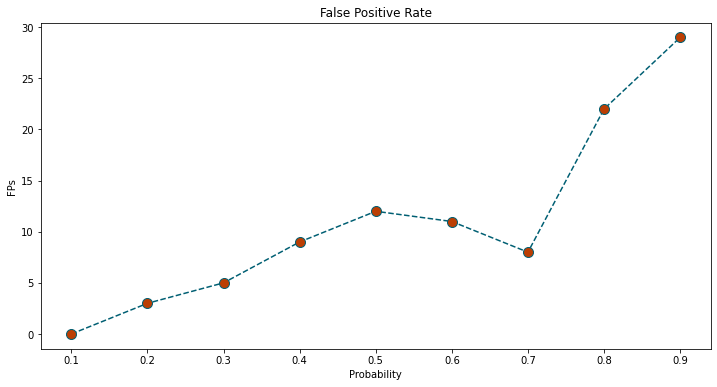

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(np.arange(0.1, 1, 0.1), FPs, color='#005f73', linestyle='dashed', marker='o',  
         markerfacecolor='#bb3e03', markersize=10)
plt.title('False Positive Rate')  
plt.xlabel('Probability')  
plt.ylabel('FPs') 

Text(0, 0.5, 'FNs')

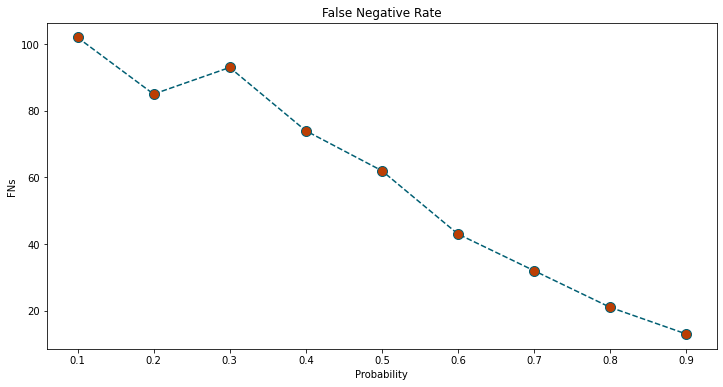

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(np.arange(0.1, 1, 0.1), FNs, color='#005f73', linestyle='dashed', marker='o',  
         markerfacecolor='#bb3e03', markersize=10)
plt.title('False Negative Rate')  
plt.xlabel('Probability')  
plt.ylabel('FNs') 

Text(0, 0.5, 'Accuracy')

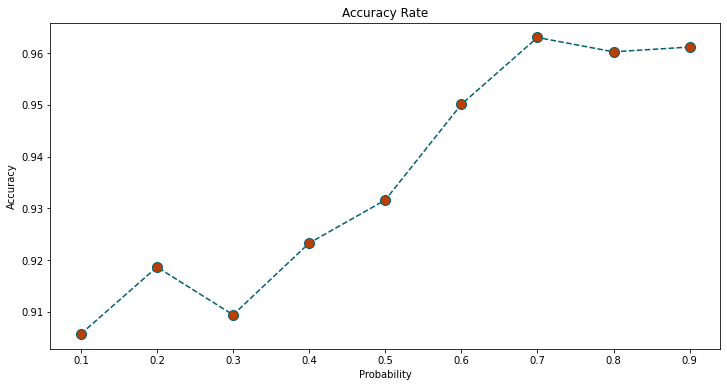

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(np.arange(0.1, 1, 0.1), accuracys, color='#005f73', linestyle='dashed', marker='o',  
         markerfacecolor='#bb3e03', markersize=10)
plt.title('Accuracy Rate')  
plt.xlabel('Probability')  
plt.ylabel('Accuracy') 

# Regressão Logistica

In [ ]:
LR = LogisticRegression(solver='saga',multi_class='multinomial').fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
yhat = LR.predict(X_test)
yhat

array([5, 0, 1, ..., 3, 2, 3], dtype=int8)

In [ ]:
f1_score(y_test, yhat, average='weighted') 

0.8225979316113975

In [ ]:
print("Accuracy Test:",accuracy_score(y_test, yhat))
#print("Precision Test:",metrics.precision_score(y_test, yhat))

Accuracy Test: 0.8253234750462107


In [ ]:
y_proba = LR.predict_proba(X_test)

In [ ]:
y_proba[0]

array([2.89e-01, 5.38e-03, 1.95e-01, 3.97e-02, 1.58e-04, 4.70e-01])

In [ ]:
labels = df_trat["label"].unique()
labels.sort()

              precision    recall  f1-score   support

           0       0.66      0.62      0.64       166
           1       0.91      0.90      0.90       184
           2       1.00      0.63      0.77       177
           3       0.73      1.00      0.85       184
           4       0.99      1.00      1.00       197
           5       0.72      0.76      0.74       174

    accuracy                           0.83      1082
   macro avg       0.84      0.82      0.82      1082
weighted avg       0.84      0.83      0.82      1082

Confusion matrix, without normalization
[[103  16   0   0   0  47]
 [ 11 165   0   1   1   6]
 [  0   0 111  66   0   0]
 [  0   0   0 184   0   0]
 [  0   0   0   0 197   0]
 [ 41   0   0   0   0 133]]


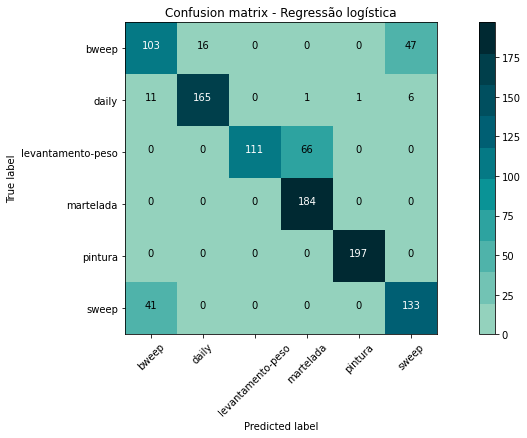

In [ ]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=labels.tolist())
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure(figsize=(12, 6))
plot_confusion_matrix(cnf_matrix, classes=labelsNameFinal.tolist(),normalize= False,  title='Confusion matrix - Regressão logística')

In [ ]:
num_folds = 5
scores = cross_val_score(LR, X_train, y_train, cv = num_folds)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
scores

array([0.8 , 0.82, 0.87, 0.82, 0.78])

In [ ]:
for v in scores:
  print(v)

0.8
0.8237623762376237
0.8653465346534653
0.8217821782178217
0.7797619047619048


In [ ]:
stdevCross = scores.std()
stdevCross

0.02854915355279615

#SVM

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [ ]:
yhat = clf.predict(X_test)
yhat 

array([5, 0, 0, ..., 2, 2, 2], dtype=int8)

In [ ]:
f1_score(y_test, yhat, average='weighted') 

0.5145600903774786

In [ ]:
print("Accuracy:",accuracy_score(y_test, yhat))

Accuracy: 0.5988909426987061


              precision    recall  f1-score   support

           0       0.83      0.89      0.86       166
           1       0.98      0.90      0.94       184
           2       0.32      1.00      0.48       177
           3       0.00      0.00      0.00       184
           4       0.00      0.00      0.00       197
           5       0.89      0.90      0.90       174

    accuracy                           0.60      1082
   macro avg       0.50      0.62      0.53      1082
weighted avg       0.49      0.60      0.51      1082

Confusion matrix, without normalization
[[148   4   0   0   0  14]
 [ 13 166   0   0   0   5]
 [  0   0 177   0   0   0]
 [  0   0 184   0   0   0]
 [  0   0 197   0   0   0]
 [ 17   0   0   0   0 157]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


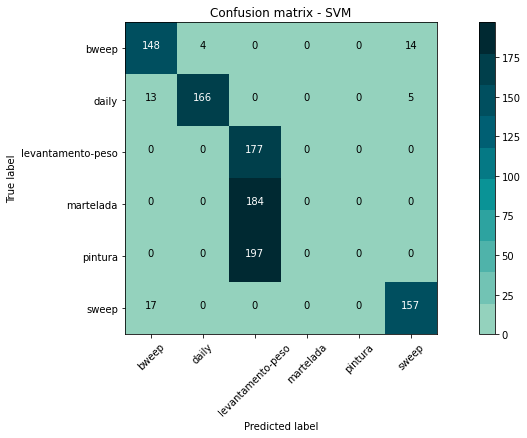

In [ ]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=labels.tolist())
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure(figsize=(12, 6))
plot_confusion_matrix(cnf_matrix, classes=labelsNameFinal.tolist(),normalize= False,  title='Confusion matrix - SVM')

In [ ]:
num_folds = 5
scores = cross_val_score(clf, X_train, y_train, cv = num_folds)

In [ ]:
scores

array([0.62, 0.63, 0.63, 0.63, 0.64])

In [ ]:
for v in scores:
  print(v)

0.6178217821782178
0.6277227722772277
0.6336633663366337
0.6316831683168317
0.6428571428571429


In [ ]:
stdevCross = scores.std()
stdevCross

0.00815161748108943

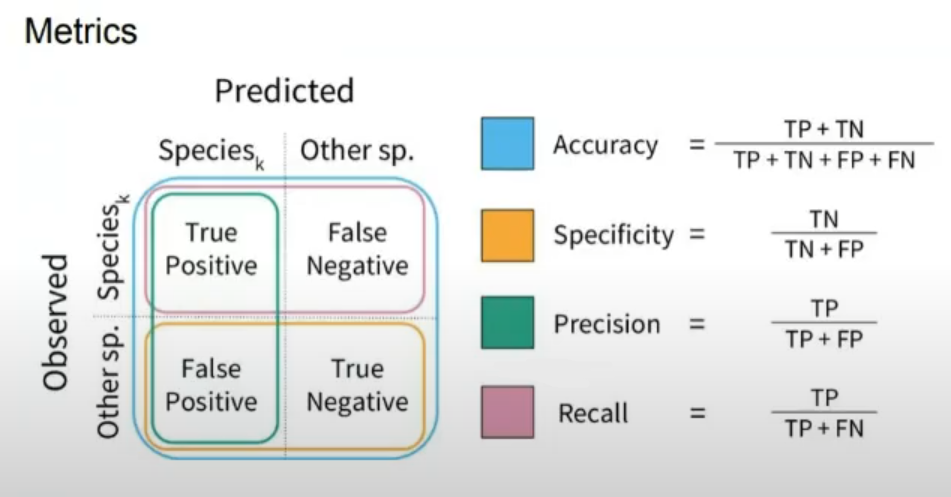